# Importing experiment data

In [1]:
from pyfitit import *

project = loadProject('FeterpyProject.py', expFile = 'exp_excited.txt')

Using TensorFlow backend.


# Importing XANES calculated for support points

In [2]:
sample = readSample('IHS_729')
sampleCompare = readSample('line_200')

# Construct the direct estimator

In [3]:
convolutionParams = {'Gamma_hole':6.1305, 'Ecent':27.771, 'Elarg':1, 'Efermi':10.075, 
                     'Gamma_max':13.238, 'shift':7112.6, 'norm':None}

directEstimator = constructDirectEstimator('Extra Trees', project, convolutionParams, CVcount=2)

# Compare different machine learning methods

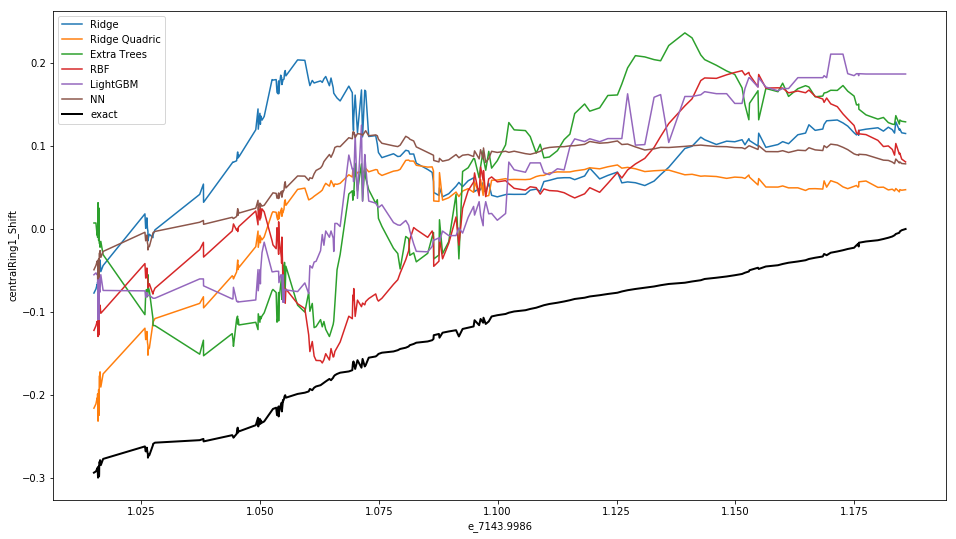

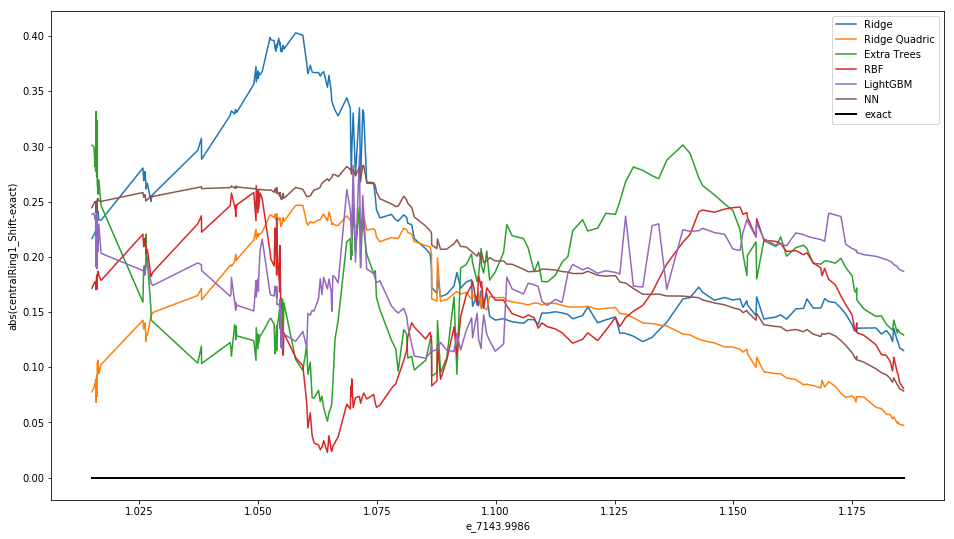

In [6]:
directEstimator.compareDifferentMethods(sampleTrain = sample, sampleTest = sampleCompare, 
    energyPoint=7143, geometryParam='centralRing1_Shift', 
    doCV = False, folderToSaveResult = 'results/directMethodsCompare_centralRing1_Shift')

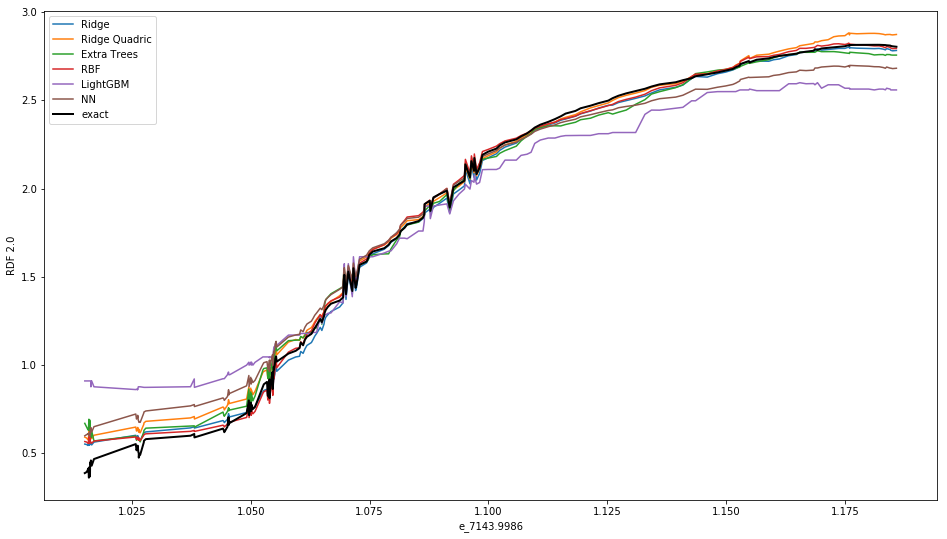

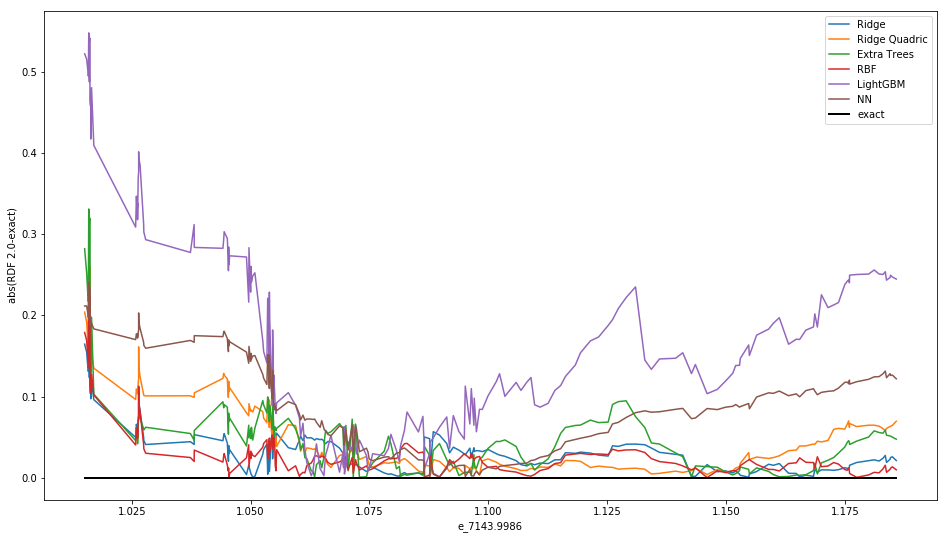

In [5]:
directEstimator.compareDifferentMethods(sampleTrain = sample, sampleTest = sampleCompare, 
    energyPoint=7143, geometryParam={'type':'RDF', 'value':2, 'params':{'sigma':0.2, 'atomName':'N'}}, 
    doCV = False, folderToSaveResult = 'results/directMethodsCompare_RDF')

# Train the estimator

In [4]:
directEstimator.fit(sample)

2  cross validation of regression:
centralRing1_Shift relToConstPredError = 0.727 RMSE = 0.196
centralRing2_Shift relToConstPredError = 0.746 RMSE = 0.199
sideRings1_Elong relToConstPredError = 0.638 RMSE = 0.184
sideRings1_Shift relToConstPredError =   0.9 RMSE = 0.219
sideRings2_Elong relToConstPredError = 0.632 RMSE = 0.184
sideRings2_Shift relToConstPredError =  0.91 RMSE =  0.22


# Predict the geometry for experimetal data

In [5]:
directEstimator.predict(project.spectrum, folderToSaveResult = 'results/directMethodResults', smooth=False)

centralRing1_Shift = 0.22206310013717429
centralRing2_Shift = 0.19822770919067217
sideRings1_Elong = 0.12562414266117972
sideRings1_Shift = 0.059122085048010975
sideRings2_Elong = 0.0923731138545954
sideRings2_Shift = 0.08829080932784644
